In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [8]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [9]:
# Step 3: Preprocess the Data
train_images = train_images / 255.0
test_images = test_images / 255.0


In [10]:
# Reshape images to add a channel dimension
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)


In [11]:
# Step 4: Build the Model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [12]:
# Step 5: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 30s 14ms/step - loss: 0.5095 - accuracy: 0.8128 - val_loss: 0.4073 - val_accuracy: 0.8445
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3282 - accuracy: 0.8804 - val_loss: 0.3116 - val_accuracy: 0.8872
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2778 - accuracy: 0.8976 - val_loss: 0.2934 - val_accuracy: 0.8914
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2486 - accuracy: 0.9089 - val_loss: 0.2734 - val_accuracy: 0.9014
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2256 - accuracy: 0.9151 - val_loss: 0.2747 - val_accuracy: 0.8996
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2047 - accuracy: 0.9229 - val_loss: 0.2580 - val_accuracy: 0.9074
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1880 - accuracy: 0.9294 - val_loss: 0.2641 -

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.2685 - accuracy: 0.9084
Test accuracy: 0.9083999991416931


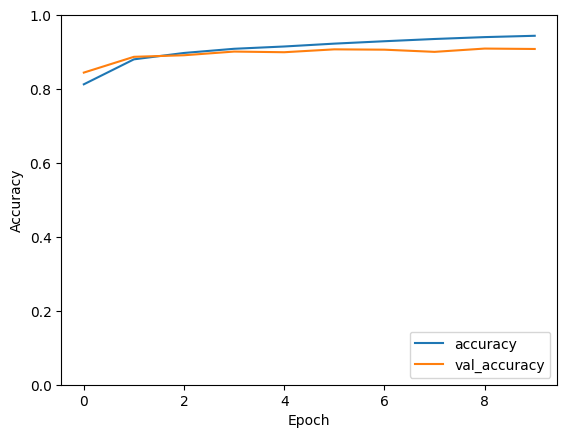

In [15]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [16]:
# Make predictions on test images
predictions = model.predict(test_images)


313/313 [==============================] - 1s 4ms/step


In [17]:
# Get predicted labels
predicted_labels = np.argmax(predictions, axis=1)


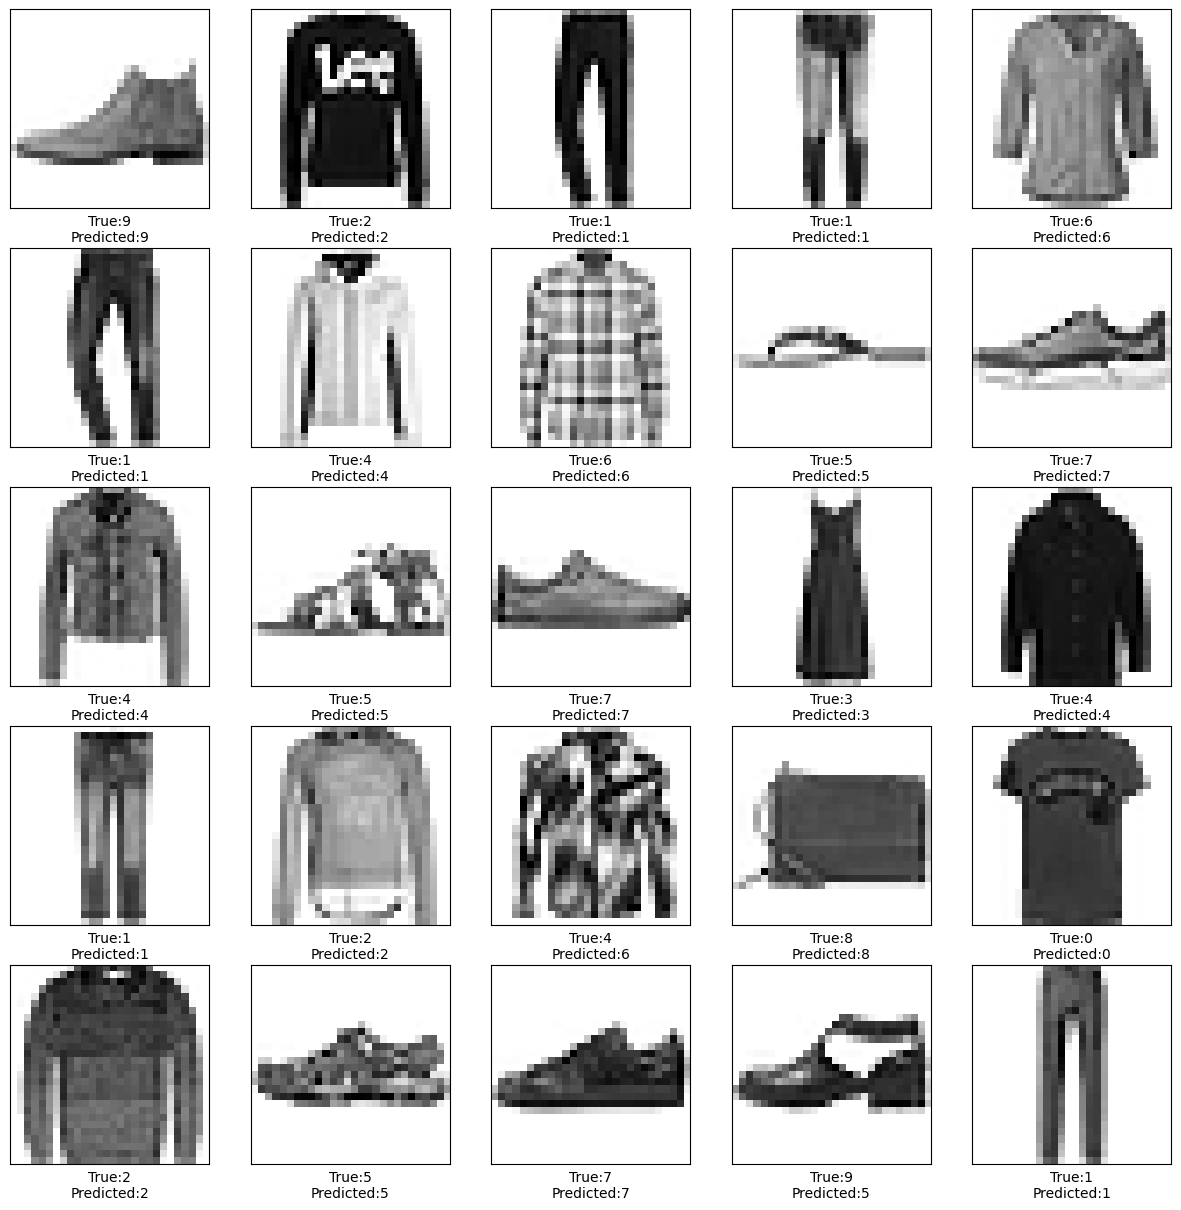

In [18]:
# Display some images along with their predicted labels
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"True:{test_labels[i]}\nPredicted:{predicted_labels[i]}")
plt.show()